In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 17.5 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=2f9ee041db5a93576aed83468d71f53729a7e05f3d3dd1e1db191e619725783a
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.2 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=d75d28ddad0c098ddbf26248d4f6838cf6d86c35043c9fa4b32807ab37bbe83c
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=0a734c68c756ffe05d079e660bd9ce0642ae59dc39f97c

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.7 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [46]:
book = "alibaba_ The Inside Story Behind Jack Ma and the Creation of the World_s Biggest Online Marketplace ( PDFDrive )"
startdate = 1600
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Jack_Ma"
titlename = "Jack_Ma"

In [47]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [48]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [49]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

10
1/chapter_1
1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9
1/chapter_10


In [50]:
mp_bert

{'1/chapter_1': [('jack ma', 0.555),
  ('ing jack ma', 0.5423),
  ('suzhou dialect wit', 0.4491),
  ('ma legend', 0.4142),
  ('jack', 0.391)],
 '1/chapter_2': [('dawnjack ma', 0.4781),
  ('jack ma', 0.4647),
  ('jack ma turne', 0.4332),
  ('dawn 33establishing', 0.3991),
  ('night ma', 0.3757)],
 '1/chapter_3': [('small enlightenmentssuccessful entrepreneurs', 0.5381),
  ('small enlightenments', 0.529),
  ('small enlightenments 59money', 0.513),
  ('westerntwo small enlightenments 47e', 0.5083),
  ('small enlightenments 65cai', 0.5017)],
 '1/chapter_4': [('alibaba ceo jack ma', 0.5542),
  ('enterprises', 0.4232),
  ('silicon valley ofﬁce', 0.4104),
  ('businessmen', 0.4007),
  ('industry', 0.3976)],
 '1/chapter_5': [('taobao users', 0.611),
  ('future taobao', 0.5889),
  ('taobao', 0.5888),
  ('taobao sellers', 0.5605),
  ('taobao devel', 0.5524)],
 '1/chapter_6': [('alipay service', 0.6003),
  ('alipay account', 0.5957),
  ('merchants bank', 0.568),
  ('paypal china', 0.5659),
  ('int

In [51]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [52]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15
15


In [53]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'taobao users', 'ma legend', 'despair to steely', 'Alibaba CEO Jack', 'industry', 'merchants bank', 'alipay account', 'translation house', 'hoo', 'dawnjack ma', 'alipay service', 'Alibaba.com China Holding', 'social change', 'municipal government', 'taobao', 'industries', 'corporate culture', 'Alibaba', 'ﬁnancing', 'night ma', 'people', 'venture capital', 'middle school', 'ceo', 'thinkin g understandin', 'owned subsidiary', 'import and export', 'China Jerry Yang', 'Personal Life', 'search platform', 'wit', 'mental training', 'alibaba ceo jack ma', 'college', 'alibaba group', 'intellectual property', 'Jack', 'small enlightenmentssuccessful entrepreneurs', 'Internet', 'successful', 'return to Hangzhou.He', 'instant messaging', 'exhilaration to despair', 'small enlightenments 65cai', 'ganizationa structure', 'time', 'handheld devices', 'online payment', 'Alipay', 'Yahoo', 'alibaba domain', 'fter a hiatus', 'resources', 'china search market', 'foreign language', 'international trade', 'se

In [54]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Suzhou_Dialect_Wit_1980': ['1/chapter_1'], 'Collegecompared_To_Luminaries_1980': ['1/chapter_1'], 'Successful_1980': ['1/chapter_1'], 'Foreigners_1980': ['1/chapter_1'], 'Ma_Legend_1980': ['1/chapter_1'], 'Time_1980': ['1/chapter_1'], 'People_1980': ['1/chapter_1'], 'Middle_School_1980': ['1/chapter_1'], 'Martial_Arts_1980': ['1/chapter_1'], 'Martial_Arts_2003': ['1/chapter_4'], 'Martial_Arts_2005': ['1/chapter_9'], 'Martial_Arts_2007': ['1/chapter_10'], 'Foreign_Language_1980': ['1/chapter_1'], 'College_1980': ['1/chapter_1'], 'Ing_Jack_Ma_1980': ['1/chapter_1'], 'Jack_Ma_1980': ['1/chapter_1'], 'Jack_Ma_1995': ['1/chapter_2'], 'Jack_Ma_2005': ['1/chapter_9'], 'Fter_A_Hiatus_1980': ['1/chapter_1'], 'Jack_2005': ['1/chapter_9'], 'Decided_1995': ['1/chapter_2'], 'Translation_House_1995': ['1/chapter_2'], 'Wit_1995': ['1/chapter_2'], 'Wit_2003': ['1/chapter_6'], 'Decision_1995': ['1/chapter_2'], 'Decision_2005': ['1/chapter_9'], 'Night_Ma_1995': ['1/chapter_

In [55]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [56]:
key_yr_chap_mp

defaultdict(list,
            {'Suzhou_Dialect_Wit_1980': ['1/chapter_1'],
             'Collegecompared_To_Luminaries_1980': ['1/chapter_1'],
             'Successful_1980': ['1/chapter_1'],
             'Foreigners_1980': ['1/chapter_1'],
             'Ma_Legend_1980': ['1/chapter_1'],
             'Time_1980': ['1/chapter_1'],
             'People_1980': ['1/chapter_1'],
             'Middle_School_1980': ['1/chapter_1'],
             'Martial_Arts_1980': ['1/chapter_1'],
             'Martial_Arts_2003': ['1/chapter_4'],
             'Martial_Arts_2005': ['1/chapter_9'],
             'Martial_Arts_2007': ['1/chapter_10'],
             'Foreign_Language_1980': ['1/chapter_1'],
             'College_1980': ['1/chapter_1'],
             'Ing_Jack_Ma_1980': ['1/chapter_1'],
             'Jack_Ma_1980': ['1/chapter_1'],
             'Jack_Ma_1995': ['1/chapter_2'],
             'Jack_Ma_2005': ['1/chapter_9'],
             'Fter_A_Hiatus_1980': ['1/chapter_1'],
             'Jack_2005':

In [57]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Suzhou_Dialect_Wit_1980
Collegecompared_To_Luminaries_1980
Successful_1980
Foreigners_1980
Ma_Legend_1980
Time_1980
People_1980
Middle_School_1980
Martial_Arts_1980
Martial_Arts_2003
Martial_Arts_2005
Martial_Arts_2007
Foreign_Language_1980
College_1980
Ing_Jack_Ma_1980
Jack_Ma_1980
Jack_Ma_1995
Jack_Ma_2005
Fter_A_Hiatus_1980
Jack_2005
Decided_1995
Translation_House_1995
Wit_1995
Wit_2003
Decision_1995
Decision_2005
Night_Ma_1995
Dawnjack_Ma_1995
Dawn_33Establishing_1995
Import_And_Export_1995
Jack_Ma_Turne_1995
Return_To_Hangzhou.He_1995
Municipal_Government_1995
In-Tended_To_Return_1995
Despair_To_Steely_1995
Exhilaration_To_Despair_1995
Alibaba_2008
Alibaba_2007
Small_Enlightenments_65Cai_1999
Internet_1999
Internet_2003
Internet_2008
Small_Enlightenments_59Money_1999
Financing_1999
Westerntwo_Small_Enlightenments_47E_1999
China_1999
China_2003
China_2005
China_2008
China_2007
Small_Enlightenments_1999
Baptism_Of_Fire_1999
Venture_Capital_1999
Venture_Capital_2003
International_Tra

In [58]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [59]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life_and_education', 'Business_career', 'Early_career', 'Chair_of_Alibaba_Group', 'Disappearance_from_the_public_eye', 'Entertainment_career', 'Awards_and_honors', 'Views', 'Philanthropy', 'Notes', 'References', 'External_links']


In [60]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [61]:
mp_sim_score

{'Early_life_and_education->Suzhou_Dialect_Wit_1980': tensor(0.5045, device='cuda:0'),
 'Early_life_and_education->Collegecompared_To_Luminaries_1980': tensor(0.3341, device='cuda:0'),
 'Early_life_and_education->Successful_1980': tensor(0.3540, device='cuda:0'),
 'Early_life_and_education->Middle_School_1980': tensor(0.4054, device='cuda:0'),
 'Early_life_and_education->Martial_Arts_1980': tensor(0.3435, device='cuda:0'),
 'Early_life_and_education->Martial_Arts_2003': tensor(0.2822, device='cuda:0'),
 'Early_life_and_education->Martial_Arts_2005': tensor(0.4421, device='cuda:0'),
 'Early_life_and_education->Martial_Arts_2007': tensor(0.2702, device='cuda:0'),
 'Early_life_and_education->Foreign_Language_1980': tensor(0.3377, device='cuda:0'),
 'Early_life_and_education->College_1980': tensor(0.3341, device='cuda:0'),
 'Early_life_and_education->Jack_Ma_1995': tensor(0.4823, device='cuda:0'),
 'Early_life_and_education->Jack_Ma_2005': tensor(0.4818, device='cuda:0'),
 'Early_life_and_

In [62]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [63]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [64]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [65]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

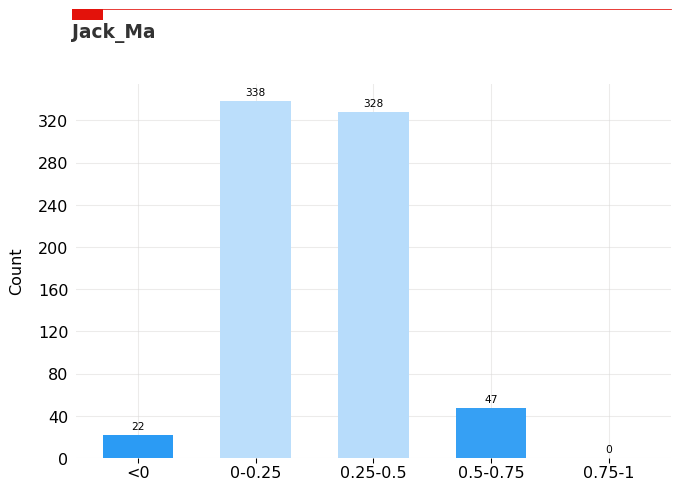

In [66]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [67]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_life_and_education': 1983, 'Business_career': -1, 'Early_career': 1999, 'Chair_of_Alibaba_Group': 2012, 'Disappearance_from_the_public_eye': 2021, 'Entertainment_career': 2018, 'Awards_and_honors': -1, 'Views': 2018, 'Philanthropy': 2015, 'Notes': -1, 'References': -1}


In [68]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [69]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


82


In [70]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life_and_education   ->  22
Early_career   ->  60
Chair_of_Alibaba_Group   ->  60
Disappearance_from_the_public_eye   ->  45
Entertainment_career   ->  18
Views   ->  41
Philanthropy   ->  45


In [71]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [72]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_life_and_education  ->   ['Suzhou_Dialect_Wit_1980', 'Middle_School_1980', 'Successful_1980', 'Martial_Arts_1980', 'Foreign_Language_1980']
Early_career  ->   ['Sized_Enterprises_1999', 'China_1999', 'Small_Enlightenmentssuccessful_Entrepreneurs_1999', 'Internet_1999', 'Venture_Capital_1999']
Chair_of_Alibaba_Group  ->   ['Alibaba_Family_Subsidiaries_2007', 'Alibaba_Company_2007', 'Alibaba_Companies_2007', 'Alibaba_Group_2007', 'Alibaba_2007']
Entertainment_career  ->   ['Martial_Arts_2005', 'Martial_Arts_2003']
Views  ->   ['Small_Enlightenments_59Money_1999', 'Small_Enlightenments_65Cai_1999', 'Small_Enlightenments_1999', 'Westerntwo_Small_Enlightenments_47E_1999']
{'Early_life_and_education': 5, 'Early_career': 5, 'Chair_of_Alibaba_Group': 5, 'Entertainment_career': 2, 'Views': 4}


In [73]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [74]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [75]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [76]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['China', 'Martial Arts', 'Jack Ma', 'Internet', 'Alibaba']
5
{'Early_life_and_education': 2, 'Early_career': 3, 'Chair_of_Alibaba_Group': 2, 'Entertainment_career': 0, 'Views': 0}


In [77]:
print(sum(list(mp2.values())))

7


In [78]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_life_and_education': set(), 'Early_career': set(), 'Chair_of_Alibaba_Group': set(), 'Entertainment_career': set(), 'Views': set()}
{'Early_life_and_education': 0, 'Early_career': 0, 'Chair_of_Alibaba_Group': 0, 'Entertainment_career': 0, 'Views': 0}
0


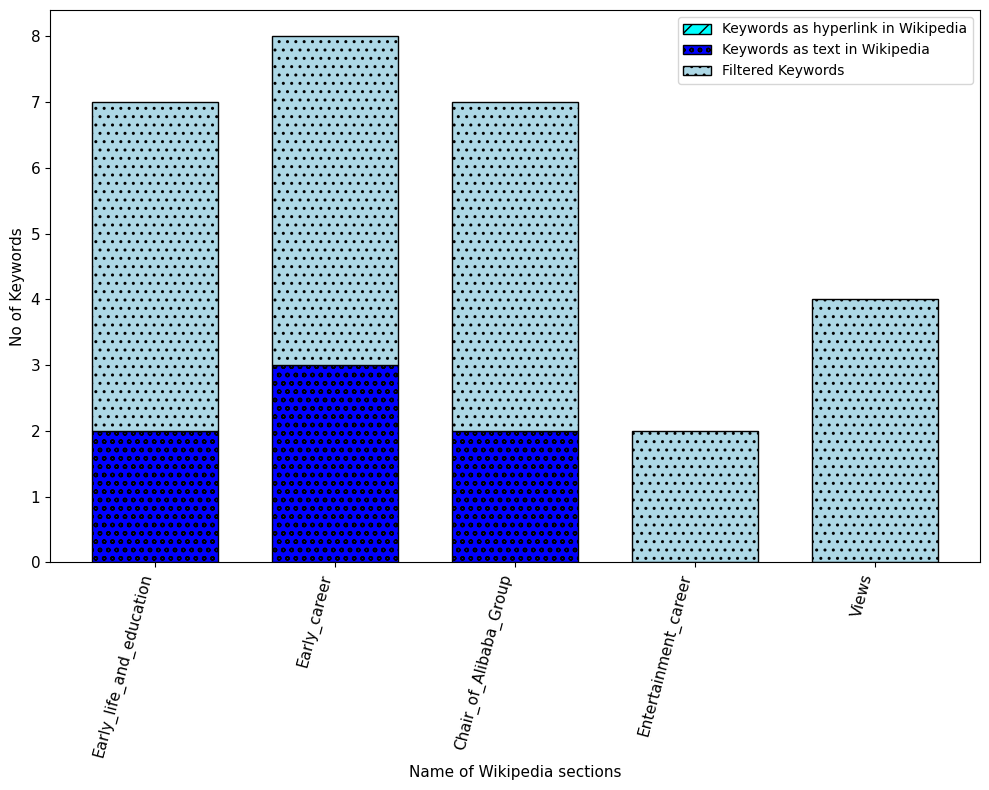

In [79]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [80]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Foreign_Language', 'Internet', 'Suzhou_Dialect_Wit', 'Alibaba_Family_Subsidiaries', 'Alibaba_Company', 'Martial_Arts', 'Small_Enlightenments', 'Venture_Capital', 'Small_Enlightenments_65Cai', 'China', 'Small_Enlightenmentssuccessful_Entrepreneurs', 'Alibaba_Companies', 'Sized_Enterprises', 'Middle_School', 'Alibaba', 'Alibaba_Group', 'Westerntwo_Small_Enlightenments_47E', 'Small_Enlightenments_59Money', 'Successful'}


In [81]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

271
{'KPMG', 'Chinese_language', 'Traditional_Chinese_characters', 'Hanyu_Pinyin', 'Chinese_economic_reform', 'Sustainable_development_goals', 'Category:Articles_with_LCCN_identifiers', 'Category:Articles_with_PLWABN_identifiers', 'CNN', 'Tmall', 'Tudou', 'Category:Articles_with_short_description', 'Tel_Aviv_University', '996_working_hour_system', 'Help:IPA/Mandarin', 'Category:Living_people', 'Ministry_of_Foreign_Trade_and_Economic_Cooperation', 'Category:Billionaires_from_Zhejiang', 'Ma_(surname)', 'China_International_Electronic_Commerce_Center', 'The_Wall_Street_Journal', 'Hangzhou', 'CNBC', 'King_Abdullah_II', 'J._Michael_Evans', 'Second_Sino-Japanese_War', 'Bloomberg_News', 'Category:All_articles_with_unsourced_statements', 'Hangzhou_Dianzi_University', 'Help:Authority_control', 'Wikipedia:Citation_needed', 'Category:Use_dmy_dates_from_July_2020', 'Category:1964_births', 'Category:Commons_category_link_is_on_Wikidata', 'Axios_(website)', 'Zhejiang', 'Zhong_Shanshan', 'Hong_Kong_U

In [82]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Alibaba_Group', 'Internet'}


2

In [83]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Westerntwo_Small_Enlightenments_47E_1999', 'Internet_1999', 'Alibaba_Family_Subsidiaries_2007', 'Martial_Arts_1980', 'Martial_Arts_2005', 'Small_Enlightenments_59Money_1999', 'Foreign_Language_1980', 'Sized_Enterprises_1999', 'China_1999', 'Small_Enlightenments_65Cai_1999', 'Successful_1980', 'Alibaba_Group_2007', 'Venture_Capital_1999', 'Martial_Arts_2003', 'Suzhou_Dialect_Wit_1980', 'Small_Enlightenments_1999', 'Alibaba_2007', 'Alibaba_Company_2007', 'Small_Enlightenmentssuccessful_Entrepreneurs_1999', 'Middle_School_1980', 'Alibaba_Companies_2007'}


In [84]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Suzhou_Dialect_Wit_1980': ['1/chapter_1'], 'Successful_1980': ['1/chapter_1'], 'Middle_School_1980': ['1/chapter_1'], 'Martial_Arts_1980': ['1/chapter_1'], 'Martial_Arts_2003': ['1/chapter_4'], 'Martial_Arts_2005': ['1/chapter_9'], 'Foreign_Language_1980': ['1/chapter_1'], 'Alibaba_2007': ['1/chapter_10'], 'Small_Enlightenments_65Cai_1999': ['1/chapter_3'], 'Internet_1999': ['1/chapter_3'], 'Small_Enlightenments_59Money_1999': ['1/chapter_3'], 'Westerntwo_Small_Enlightenments_47E_1999': ['1/chapter_3'], 'China_1999': ['1/chapter_3'], 'Small_Enlightenments_1999': ['1/chapter_3'], 'Venture_Capital_1999': ['1/chapter_3'], 'Small_Enlightenmentssuccessful_Entrepreneurs_1999': ['1/chapter_3'], 'Sized_Enterprises_1999': ['1/chapter_3'], 'Alibaba_Company_2007': ['1/chapter_10'], 'Alibaba_Companies_2007': ['1/chapter_10'], 'Alibaba_Group_2007': ['1/chapter_10'], 'Alibaba_Family_Subsidiaries_2007': ['1/chapter_10']}


In [85]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['westerntwo small enlightenments 47e', 'internet', 'alibaba family subsidiaries', 'martial arts', 'martial arts', 'small enlightenments 59money', 'foreign language', 'sized enterprises', 'china', 'small enlightenments 65cai', 'successful', 'alibaba group', 'venture capital', 'martial arts', 'suzhou dialect wit', 'small enlightenments', 'alibaba', 'alibaba company', 'small enlightenmentssuccessful entrepreneurs', 'middle school', 'alibaba companies']


In [86]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

7
21
0.3333333333333333
